In [151]:
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [153]:
churn_analysis = pd.read_csv('/Users/chirathwije/Desktop/Projects Datasets/Telecom churn analysis/churn_analysis.csv')

In [154]:
churn_analysis.head()

,customer_id,gender,age,married,dependents,No_of_ Dependents,state,city,phone _service,internet_service,...,paperles_bill,payment_type,month_charge,total,refund,revenue,churn,churn_score,churn_category,satisfaction
0,8779-QRDMV,Male,78,No,No,0,California,Los Angeles,No,Yes,...,Yes,Direct Debit,39.65,39.65,0.00,59.65,Yes,91,Competitor,3
1,7495-OOKFY,Female,74,Yes,Yes,1,California,Los Angeles,Yes,Yes,...,Yes,Credit Card,80.65,633.30,0.00,1024.10,Yes,69,Competitor,3
2,1658-BYGOY,Male,71,No,Yes,3,California,Los Angeles,Yes,Yes,...,Yes,Direct Debit,95.45,1752.55,45.61,1910.88,Yes,81,Competitor,2
3,4598-XLKNJ,Female,78,Yes,Yes,1,California,Inglewood,Yes,Yes,...,Yes,Direct Debit,98.50,2514.50,13.43,2995.07,Yes,88,Dissatisfaction,2
4,4846-WHAFZ,Female,80,Yes,Yes,1,California,Whittier,Yes,Yes,...,Yes,Direct Debit,76.50,2868.15,0.00,3102.36,Yes,67,Price,2


In [155]:
churn_analysis.keys()

Index(['customer_id', 'gender', 'age', 'married', 'dependents',
       'No_of_ Dependents', 'state', 'city', 'phone _service',
       'internet_service', 'type', 'online_security', 'backup',
       'device_protection', 'tech_support', 'tv', 'cinema', 'un_data',
       'contract', 'paperles_bill', 'payment_type', 'month_charge', 'total',
       'refund', 'revenue', 'churn', 'churn_score', 'churn_category',
       'satisfaction '],
      dtype='object')

### 1). What is the overall churn distribution, and how do key risk factors (contract type, tech support) correlate with churn?

/var/folders/7p/fs1s08gd67g8rv7fgmqhmkhr0000gn/T/ipykernel_18515/2453408563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(churn_analysis,x='churn', palette='pastel')


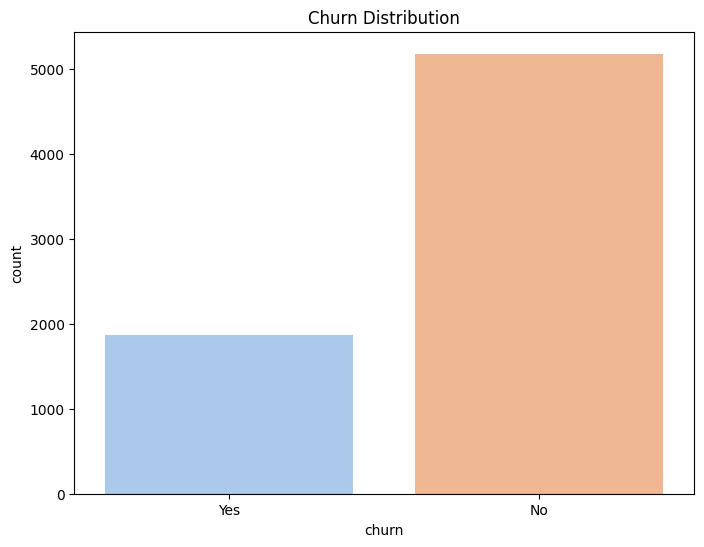

In [160]:
plt.figure(figsize=(8,6))
sns.countplot(churn_analysis,x='churn', palette='pastel')
plt.title('Churn Distribution')
plt.show()

In [171]:
if churn_analysis['churn'].dtype == 'object':
    churn_analysis['churn_numeric'] = (churn_analysis['churn'] == 'Yes').astype(int)
else:
    churn_analysis['churn_numeric'] = churn_analysis['churn']

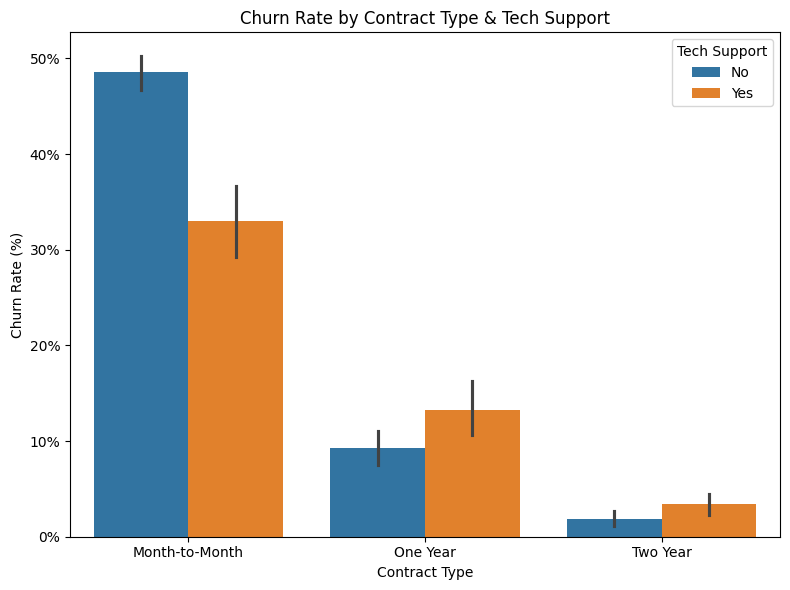

In [215]:
plt.figure(figsize=(8,6))
sns.barplot(x='contract', 
            y='churn_numeric', 
            hue='tech_support',
            data=churn_analysis)  
            
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.title('Churn Rate by Contract Type & Tech Support')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.legend(title='Tech Support', loc='upper right')
plt.tight_layout()
plt.show()

### Which payment methods are associated with higher churn and lower satisfaction?

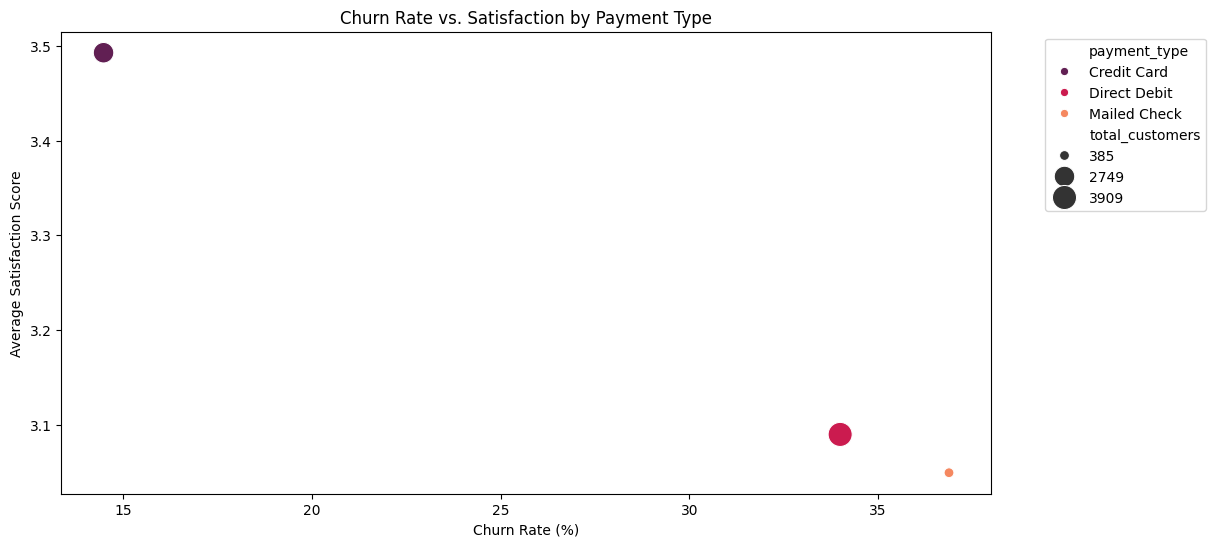

In [221]:
# Calculate churn rate and satisfaction by payment type
payment_analysis = churn_analysis.groupby('payment_type').agg(
    total_customers=('customer_id', 'count'),
    churn_rate=('churn', lambda x: (x == 'Yes').mean() * 100),
    avg_satisfaction=('satisfaction ', 'mean')
).reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='churn_rate', 
    y='avg_satisfaction', 
    hue='payment_type', 
    size='total_customers',
    sizes=(50, 300),
    data=payment_analysis,
    palette='rocket'
)
plt.title('Churn Rate vs. Satisfaction by Payment Type')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Average Satisfaction Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Are there geographic trends in churn risk?

In [232]:
if churn_analysis['device_protection'].dtype == 'object':
    churn_analysis['DP_numeric'] = (churn_analysis['device_protection'] == 'Yes').astype(int)
else:
    churn_analysis['DP_numeric'] = churn_analysis['device_protection']

In [236]:
geo_risk=churn_analysis.groupby('city').agg(
    total_customers=('customer_id','count'),
    churn_rate=('churn',lambda x:(x=='Yes').mean()*100),
    avg_device_protection=('DP_numeric','mean')
).reset_index()

In [238]:
#filter the cities that have >100 customers
geo_risk = geo_risk[geo_risk['total_customers'] > 100]

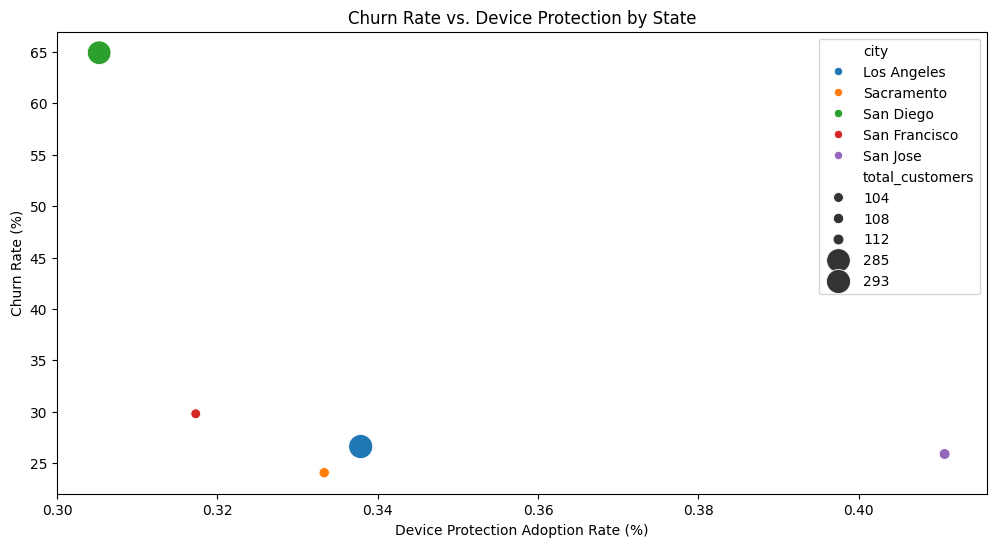

In [250]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='avg_device_protection', 
    y='churn_rate', 
    size='total_customers',
    hue='city',
    data=geo_risk,
    sizes=(50, 300))
plt.title('Churn Rate vs. Device Protection by State')
plt.xlabel('Device Protection Adoption Rate (%)')
plt.ylabel('Churn Rate (%)')
plt.show()